In [1]:
#Importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading data
url="http://bit.ly/w-data"
s_data=pd.read_csv(url)
print("Data Successfully Imported")
s_data.head(10)

Data Successfully Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


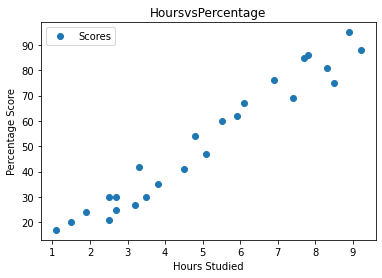

In [3]:
#Plotting the distribution of score
s_data.plot(x='Hours',y='Scores',style='o')
plt.title('HoursvsPercentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [4]:
#Preparing the data
x=s_data.iloc[:,:-1].values#all the x values
y=s_data.iloc[:,1].values#all the y values
#We can also do this like
#x=s_data[['Hours']].values

In [5]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0)

# Training the Algorithm

In [6]:
from sklearn.linear_model import LinearRegression as lr
regressor=lr()
regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


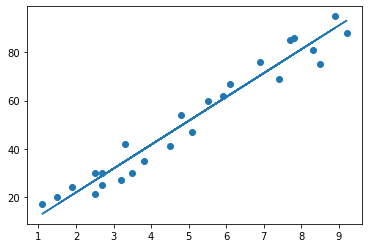

In [7]:
#Plotting regression line
line=regressor.coef_*x+regressor.intercept_#y=mx+c

#Plotting for test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# #Making Prediction

In [8]:
print(x_test)#testing data- in hrs
y_pred=regressor.predict(x_test)#predicting scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
#Comparing actual vs predicted
df=pd.DataFrame({'Actual Score':y_test,'Predicted Score':y_pred})
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
score_pred=np.array([10])
score_pred=score_pred.reshape(-1,1)
predict=regressor.predict(score_pred)
print('No of hours = {}'.format(score_pred[0]))
print('Predicted Score = {}'.format(predict[0]))

No of hours = [10]
Predicted Score = 101.12472484785705


## Evaluating the Model

In [11]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
